****

**Trabalho 1: Aula Laboratório**

**Grupo 4**

**ICMC/USP - São Carlos SP**

****

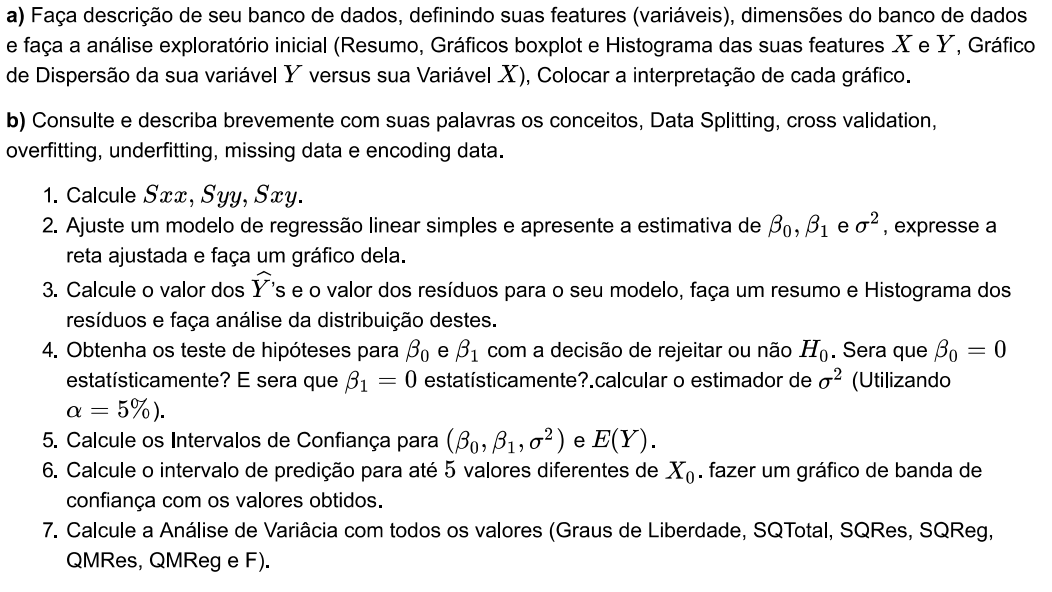

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
#Baixar os dados que o Danilo enviou no email e upar no colab para abrir os dados
dados = pd.read_csv('/content/data-table-B4.csv', encoding = 'utf-8',decimal = ',')
dados = dados.loc[:, ['x1','y']]

FileNotFoundError: ignored

O data set B.4 apresenta dados de 27 casas vendidas em Erie, Pennsylvania.

Ajuste um Modelo de regressão linear simples que relacione o preço de venda da casa (y) com os impostos atuais (x1)

In [ ]:
dados.head()

,x1,y
0,5.0208,29.5
1,4.5429,27.9
2,4.5573,25.9
3,5.0597,29.9
4,3.8910,29.9


In [ ]:
#Organizando X e Y
x = dados['x1']
y = dados['y']
n = len(x)

#A) Analise e Descrição dos Dados

In [ ]:
#Dimensão do banco de dados
print(f'Dimensão do Banco de Dados: {dados.shape}')

Dimensão do Banco de Dados: (24, 2)


In [ ]:
#Descrição sobre os dados
dados.describe()

,x1,y
count,24.000000,24.00000
mean,6.404917,34.61250
std,1.582007,6.00379
min,3.891000,25.90000
25%,5.057275,29.90000
50%,5.974300,33.70000
75%,7.873075,38.15000
max,9.141600,45.80000


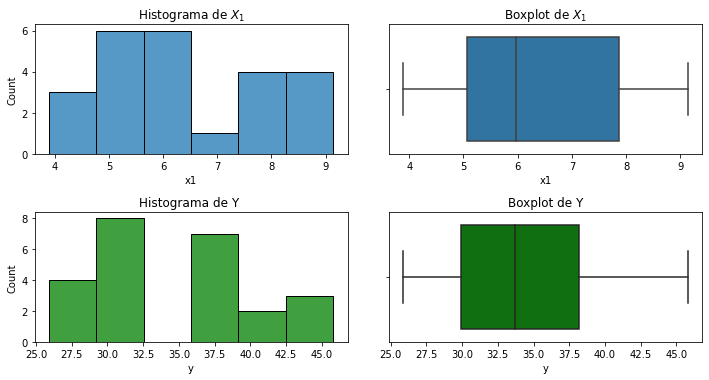

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(10,5))
plt.tight_layout()
plt.subplots_adjust(hspace=0.45)

sns.histplot(ax = axes[0,0],x = x)
axes[0,0].set_title('Histograma de $X_1$')

sns.boxplot(ax = axes[0,1],x=x)
axes[0,1].set_title('Boxplot de $X_1$')

sns.histplot(ax = axes[1,0],x = y,color = 'green')
axes[1,0].set_title('Histograma de Y ')

sns.boxplot(ax = axes[1,1],x = y,color = 'green')
axes[1,1].set_title('Boxplot de Y')

plt.savefig('ved.pdf', dpi=300)

plt.show()

Text(0.5, 1.0, 'Tabela de correlação dos dados\n')

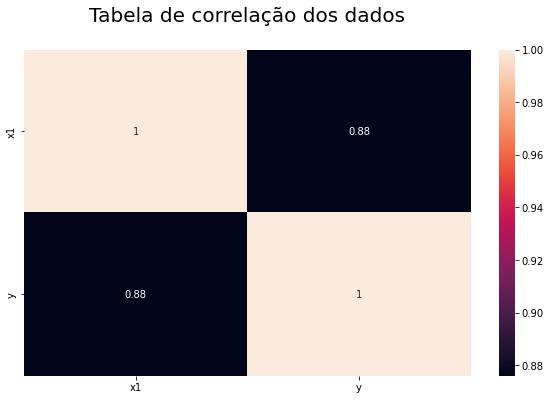

In [ ]:
#Tabela de Correlação dos dados
plt.figure(figsize=(10,6))
sns.heatmap(dados.corr(),annot= True)
plt.title("Tabela de correlação dos dados\n",fontsize = 20)

Podemos ver que x1 e y tem uma correlação alta (0.88)

Então vamos plotar o gráfico de dispersão de  X por Y


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


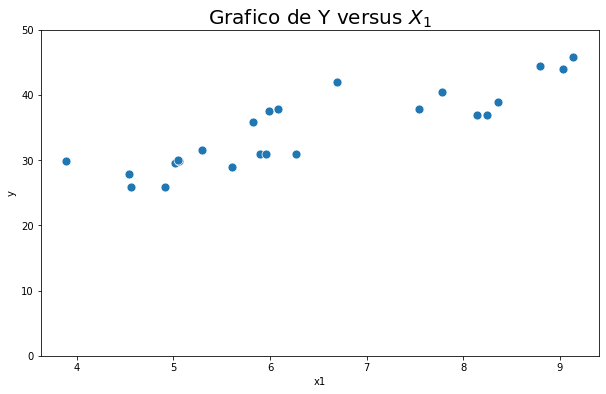

In [ ]:
#Gráfico de dispersão
plt.figure(figsize=(10,6))
plt.ylim(0,50)
sns.scatterplot(x,y,s = 80)
plt.title("Grafico de Y versus $X_1$",fontsize = 20)

plt.savefig('scatter.pdf', dpi=300)

#B) Consulte e descreva brevemente os conceitos :

1. Data Splitting
2. Cross Validation
3. Overfitting
4. Underfitting
5. Missing data
6. Enconding data




**1 - Data Splitting**

Consiste em dividir nossos dados em duas partes: dados de treino e dados de teste.
O mais comum é dividí-los aleatoriamente, para deixar bem randomico mesmo.
Nos dados de treino é onde acontecerá todas as melhorias e adaptaçoes do modelo, atraves de comparaçoes
ou definiçoes de parametros. E nos dados de teste é onde aplicaremos nossos dados definitivos (adaptados nos dados de treino)
como o objetivo final de ver o resultado do modelo.

**2 - Cross Validation**

Separa a base em k partes: pega uma parte e deixa como dados de teste, e o resto usaremos como dados de treino
Desenvolva um modelo que se encaixa em um dado de treino e aplica no dado de teste. Daí retém o resultado e descarta esse modelo; faz
outro pra outro dado de treino e aplica novamente... sempre retendo o resultado, e melhorando os modelos.

**3 - Overfitting**

Overfitting ocorre quando o modelo se ajusta demais aos dados de treinamento, causado quando o modelo é complexo. Justamente por se adequar tão bem ao treinamento, o modelo torna-se ineficaz quando utilizado com outros dados e sendo incapaz de prever resultados corretos.


**4 - Underfitting**

Underfitting ocorre quando um modelo de regressão é simples demais, sendo assim, nem mesmo os dados de treinamento vão se ajustar bem nele pois o modelo não consegue encontrar relações entre as variáveis podendo ser logo descartado.

**5 - Missing Data**

É, como o nome ja diz, quando temos dados faltando para determinada variável. temos como lidar com isso de 3 formas: imputando valores pra essas variaveis; descartando esses dados sem valor algum; ou usar análises que independam desses valores em falta.

**6 - Encoding Data**

É usado para transformar as informações em dados numéricos, para entao manipulá-los etc.


#1: Calcule $S_{xx}$, $S_{yy}$, $S_{xy}$

$S_{xx}  = \sum_{i = 1} ^n (X_i - \overline{X})^2 = \sum_{i = 1} ^n X_i^2 - n \overline{X}^2 $ 

$S_{yy}  = \sum_{i = 1} ^n (Y_i - \overline{Y})^2 = \sum_{i = 1} ^n Y_i^2 - n \overline{Y}^2 $ 

$S_{xy}  = \sum_{i = 1} ^n (X_i - \overline{X})(Y_i - \overline{Y}) = \sum_{i = 1} ^n (X_i Y_i) - n\overline{X}\overline{Y} = \sum_{i = 1} ^n (X_i - \overline{X} )Y_i$ 

In [ ]:
#Sxx
sxx = 0
for xi in x:
  sxx += (xi-np.mean(x))**2

#Syy
syy = 0
for yi in y:
  syy += (yi-np.mean(y))**2

#Sxy
sxy = 0
for xi,yi in zip(x,y):
  sxy += ((xi-np.mean(x))*(yi-np.mean(y)))

print(f'Sxx: {sxx}\nSyy: {syy}\nSxy: {sxy}')


Sxx: 57.56312745333333
Syy: 829.0462499999999
Sxy: 191.361205


#2) Ajuste um modelo de Regressão e estimativas para $\widehat{\beta}_0,\widehat{\beta}_1,\widehat{\sigma}^2$

\begin{align}
Y = \widehat{\beta}_0 + \widehat{\beta}_1 x
\end{align}
Onde:

$\widehat{\beta}_1 = \frac{S_{XY}}{S_{XX}}$

$\widehat{\beta}_0 = \overline{Y} - \beta_1 \overline{X}$

$\widehat{\sigma}^2 = \frac{SQ_{RES}}{n-2} = QM_{res}$


In [ ]:
#Estimador para B1
b1 = sxy/sxx 

#Estimador para B0
b0 = np.mean(y) - (b1*np.mean(x))

#Estimador da Variancia
##SQres

y_pred = []
for xi in x:
  yi = b0 + (b1*xi)
  y_pred.append(yi)

y_pred = np.array(y_pred)
SQres = 0
for y0,yi in zip(y,y_pred):
  SQres += (y0 - yi)**2


sigma2 = SQres/(n-2)
QMres = sigma2

print(f'B1: {b1}\nB0: {b0}\nsigma2 : {sigma2}')

B1: 3.3243712332193445
B0: 13.320179282166194
sigma2 : 8.767752951991376


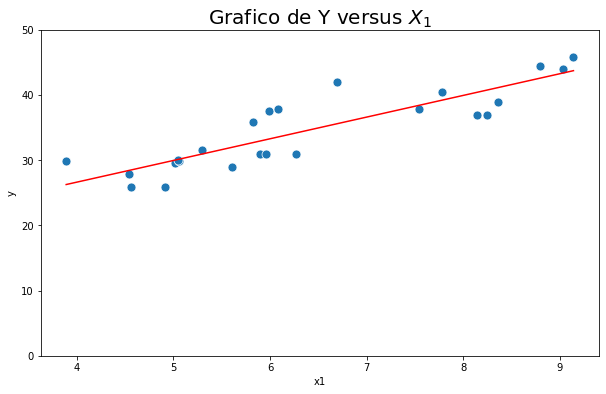

In [ ]:
#Gráfico de dispersão
plt.figure(figsize=(10,6))
plt.ylim(0,50)
sns.scatterplot(x=x,y=y,s = 80)
sns.lineplot(x=x, y=b1*x+b0, color='red')
plt.title("Grafico de Y versus $X_1$",fontsize = 20)

plt.savefig('modelo_simples.pdf', dpi=300)

#Tabela para verificar se a implementação está correta

In [ ]:
#Tabela para verificar se a implementação está correta
import statsmodels.api as sm
x_with_intercept = np.c_[np.ones(x.shape[0]), x]
print(sm.OLS(y, x_with_intercept).fit().summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     72.56
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           2.05e-08
Time:                        01:59:55   Log-Likelihood:                -59.063
No. Observations:                  24   AIC:                             122.1
Df Residuals:                      22   BIC:                             124.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3202      2.572      5.179      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


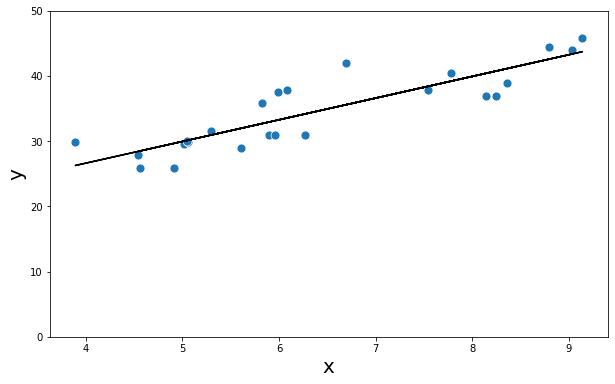

<Figure size 432x288 with 0 Axes>

In [ ]:
#Gráfico da Reta de Regressão
plt.figure(figsize=(10,6))
sns.scatterplot(x,y,s = 80)
plt.ylim(0,50)
plt.plot(x,(b0+(b1*x)),color = 'black')
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20) 
plt.show(True)

plt.savefig('reta de regressão.pdf', dpi=300)

#3) Calcule o valor dos $\widehat{Y}`s$ e o valor dos resíduos para o seu modelo, faça um resumo e histograma dos resíduos e faça a análise da distribuição destes.

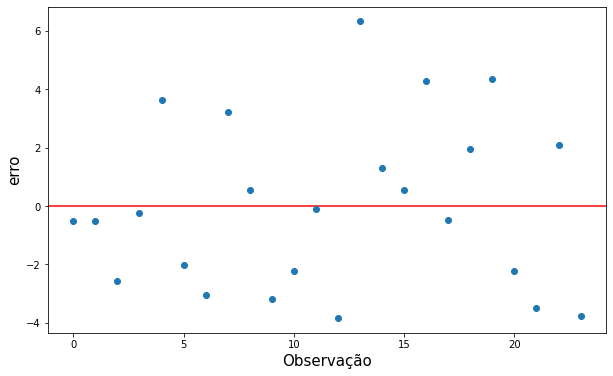

,Resíduos
count,24.000000
mean,-0.000013
std,2.895944
min,-3.834300
25%,-2.315675
50%,-0.366900
75%,1.978625
max,6.316800


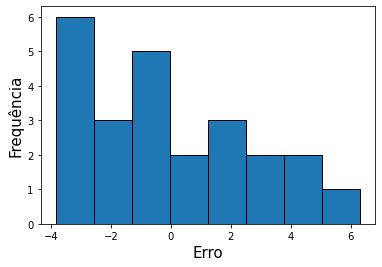

In [ ]:
e = np.array(y - y_pred)
e = np.round(e,4)
axis = np.arange(0,len(e))
plt.figure(figsize= (10,6))
plt.axhline(y = 0, color = 'red')
plt.plot(axis,e, 'o')
plt.ylabel("erro", fontsize=15)
plt.xlabel("Observação", fontsize=15)
plt.show(True)

plt.savefig('resíduos scatter.pdf', dpi=300)

plt.hist(e, bins = 8, density= False, edgecolor = 'black')
plt.xlabel("Erro", fontsize = 15)
plt.ylabel("Frequência", fontsize = 15)



plt.savefig('resíduos histograma.pdf', dpi=300)

res = pd.DataFrame({'Resíduos': e})
res.describe()

Podemos perceber que existem muitos pontos que se afastam de zero, consequência de usarmos um modelo muito simples. Mesmo assim, existem pontos que poderiam ser considerados Outliers e que por isso necessitam ser investigados.

Pelo histograma, podemos perceber que o erro tende em sua mais de 50% a ser menor que zero, fato confirmado pelo resumo produzido e observado pelos gráficos.

#4) Obtenha os testes de hipóteses para $\widehat{\beta}_0$ e $\widehat{\beta}_1$ com a decisão de rejeitar ou não $H_0$. Será que $\widehat{\beta}_0$ = 0 estatisticamente? E $\widehat{\beta}_1$ = 0 estatisticamente? Calcular o estimador $\widehat{\sigma}^2$ (utilizando $\alpha$ = 5%)

In [ ]:
from scipy.stats import t # t-student dist.
import math

###Rejeita H0 se T0 < t(0.05) ou > t(0.95)
a, b = t.interval(0.90,n-2)
print(f'Rejeita t se t < {a} ou t > {b}')

NameError: ignored

$H_0: \widehat{\beta_0}$ = 0 vs $H_1: \widehat{\beta_0} \neq 0$

$dp(\beta_0) = \sqrt{QM_{res}(\frac{1}{n} + \frac{\bar{X}^2}{S_{XX}}})$

$t_0 = \frac{\beta_0}{dp(\beta_0)}$

In [ ]:
dpb0 = math.sqrt(sigma2*((1/n)+((np.mean(x)**2)/sxx)))
print(f'dpb0 = {dpb0}')

t0= b0/dpb0
print(f'T0 = {t0}')
# 5.1794 > 1.71 
# Logo, rejeita H0 e assume intercepto

dpb0 = 2.5717217514840103
T0 = 5.179479185288919


$H_0: \widehat{\beta_1}$ = 0 vs $H_1: \widehat{\beta_1} \neq 0$

$dp(\beta_1) = \sqrt\frac{{QM_{res}}}{S_{XX}}$

$t_1 = \frac{\beta_1}{dp(\beta_1)}$

In [ ]:
dpb1 = math.sqrt(sigma2)/math.sqrt(sxx)
print(f"dpb1 = {dpb1}")

t1 = b1/dpb1
print(f'T1 = {t1}')
# 8.51 > 1.71 
# Logo, rejeita H0 e assume x1

dpb1 = 0.3902761044118829
T1 = 8.517998400719216


#5) Calcule o intervalo de Confiança para $\beta_0$, $\beta_1$ , $\sigma^2$ e E(Y)

In [ ]:
from scipy.stats import chi2

## IC para $\beta_0$

$IC[\beta_0, 1-\alpha] = \left[\widehat{\beta}_0 - t_{1-\frac{\alpha}{2}; (n-2)}\widehat{dp}(\widehat{\beta}_0); \widehat{\beta}_0 - t_{\frac{\alpha}{2}; (n-2)}\widehat{dp}(\widehat{\beta}_0)\right]$

In [ ]:
t_inf, t_sup = t.interval(0.9, n-2)
print(t_inf, t_sup)

-1.7171443743802426 1.717144374380242


In [ ]:
IC_b0 = (b0-t_sup*dpb0, b0-t_inf*dpb0)
print(IC_b0)

(8.904161744134123, 17.736196820198266)


## IC para $\beta_1$

$IC[\beta_1, 1-\alpha] = \left[\widehat{\beta}_1 - t_{1-\frac{\alpha}{2}; (n-2)}\widehat{dp}(\widehat{\beta}_1); \widehat{\beta}_1 - t_{\frac{\alpha}{2}; (n-2)}\widehat{dp}(\widehat{\beta}_1)\right]$

In [ ]:
IC_b1 = (b1-t_sup*dpb1, b1-t_inf*dpb1)
print(IC_b1)

(2.654210816073444, 3.9945316503652455)


## IC para $\sigma^2$

$IC \left[ \sigma^2, 1-\alpha \right] = \left [  \frac{SQ_{res}}{\chi^{2}_{1-\frac{\alpha}{2},(n-2) }}, \frac{SQ_{res}}{\chi^{2}_{\frac{\alpha}{2}, (n-2)}}  \right]$

In [ ]:
inf_chi2, sup_chi2 = chi2.interval(0.9, n-2)
print(f"chi2: [{inf_chi2},{sup_chi2}]")

chi2: [12.338014578790647,33.92443847144381]


In [ ]:
 IC_sigma2 = (SQres/sup_chi2, SQres/inf_chi2)
 print(IC_sigma2)

(5.685888216135916, 15.633841548168855)


## IC para $E(Y)$

$IC\left[\mu_{Y|X_0}, 1-\alpha\right] = \left[  \widehat{\mu}_{Y|X_0} + t_{(1-\frac{\alpha}{2})} \sqrt{QM_{res} \left(\frac{1}{n} + \frac{(X_0-\bar{X})^2}{S_{XX}}\right)},  \widehat{\mu}_{Y|X_0} -  t_{(\frac{\alpha}{2})} \sqrt{QM_{res} \left(\frac{1}{n} + \frac{(X_0-\bar{X})^2}{S_{XX}}\right)}\right]$

In [ ]:
def IC_Ey(x0): # verificar se ta certo
    mu_hat = b1*x0 +b0
    inf, sup = t.interval(0.9, n-2)
    return (mu_hat - sup*np.sqrt(QMres*(1/n + ((x0-np.mean(x))**2)/sxx)), 
            mu_hat - inf*np.sqrt(QMres*(1/n + ((x0-np.mean(x))**2)/sxx)))

In [ ]:
IC_Ey(x[5])

(31.835261946695606, 34.01937968469217)

In [ ]:
x[5]*b1 +b0

32.92732081569389

In [ ]:
IC_Ey = np.vectorize(IC_Ey) # vetorizando a função do intervalo de confiança

# 6

In [ ]:
def pred_interval(x0):
    y0 = b1*x0+b0
    inf, sup = t.interval(0.9, n-1)
    return (y0 + inf*np.sqrt(QMres*(1+ 1/n + ((x0-np.mean(x))**2)/sxx)), 
            y0 + sup*np.sqrt(QMres*(1+ 1/n + ((x0-np.mean(x))**2)/sxx)))

In [ ]:
pred_interval = np.vectorize(pred_interval)

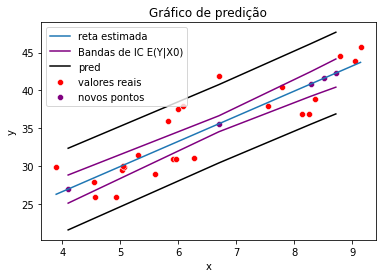

In [ ]:
np.random.seed(692) # fixando uma seed

sns.scatterplot(x=x, y=y, color='r', label="valores reais")
sns.lineplot(x=x, y=b1*x+b0, label="reta estimada")

inf_x, sup_x = x.min(), x.max()
new_points = np.random.random((5,))*(sup_x-inf_x)+inf_x # gerando valores no intervalo [inf_x,sup_x]

sns.scatterplot(x=new_points,y=b1*new_points+b0, color="purple", label="novos pontos")

# # bandas de confiança para os novos pontos
sns.lineplot(x=new_points, y=IC_Ey(new_points)[0], color='purple', label="Bandas de IC E(Y|X0)")
sns.lineplot(x=new_points, y=IC_Ey(new_points)[1], color='purple')

# # bandas de intervalo de predição
sns.lineplot(x=new_points, y=pred_interval(new_points)[0], color='black', label="pred")
sns.lineplot(x=new_points, y=pred_interval(new_points)[1], color='black')


plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico de predição");

plt.savefig('predição.pdf', dpi=300)

# 7 Calcule ANOVA

In [ ]:
# Graus de liberdade
gl_reg=1
gl_res=n-2
gl_total=gl_reg+gl_res

# Soma do Quadrado - SQ
SQreg = b1*sxy
SQres = np.sum((y-(b1*x+b0))**2)
SQtotal = np.sum((y-np.mean(y))**2)

# Quadrado Médio - QM
QM_reg = SQreg/gl_reg 
QM_res = SQres/gl_res 
QM_total = 0

# F
F = QM_reg/QM_res 

print(f"""
-----------------------------------ANOVA-----------------------------------
g.l\tSQ\t\t\tQM\t\t\tF
{gl_reg}\t{SQreg}\t{QM_reg}\t{F}
{gl_res}\t{SQres}\t{SQreg}
{gl_total}\t{SQtotal}\t\t{QM_total}
""")


-----------------------------------ANOVA-----------------------------------
g.l	SQ			QM			F
1	636.1556850561898	636.1556850561898	72.55629675465511
22	192.89056494381032	636.1556850561898
23	829.04625		0

